In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [34]:
data = pd.read_csv('Paitients_Files_Train.csv')

In [35]:
data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [37]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


In [49]:
data.isna().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [38]:
numerics=data.select_dtypes(include='number')
cat = data.select_dtypes(include='object')

In [39]:
numerics

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,1
597,1,89,24,19,25,27.8,0.559,21,0


In [13]:
cat

,ID,Sepssis
0,ICU200010,Positive
1,ICU200011,Negative
2,ICU200012,Positive
3,ICU200013,Negative
4,ICU200014,Positive
...,...,...
594,ICU200604,Negative
595,ICU200605,Positive
596,ICU200606,Negative
597,ICU200607,Negative


In [40]:
data=data.drop(columns='ID')

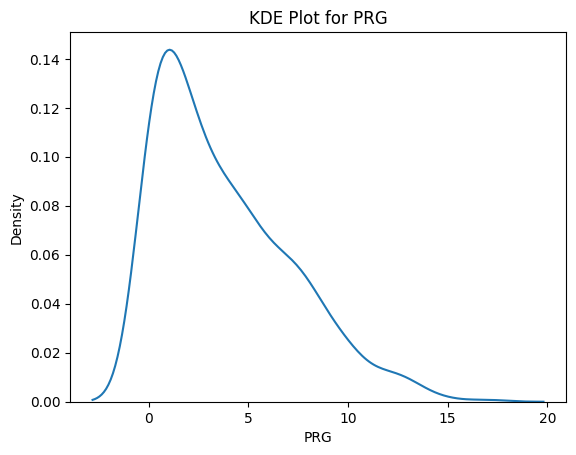

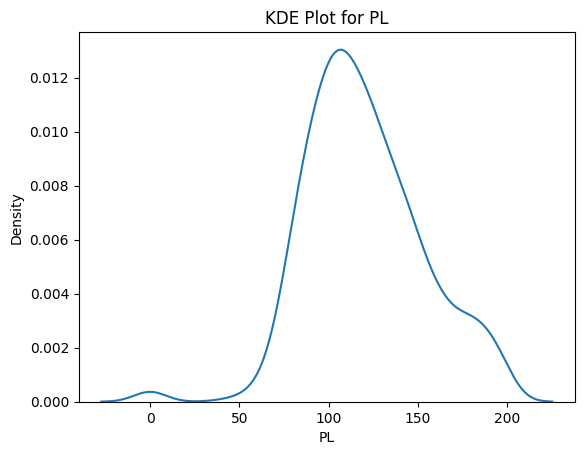

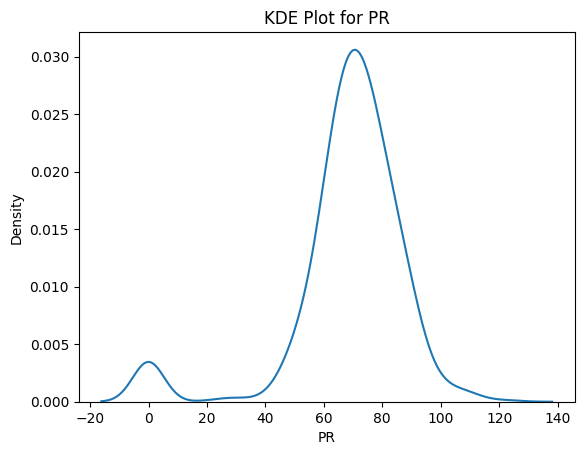

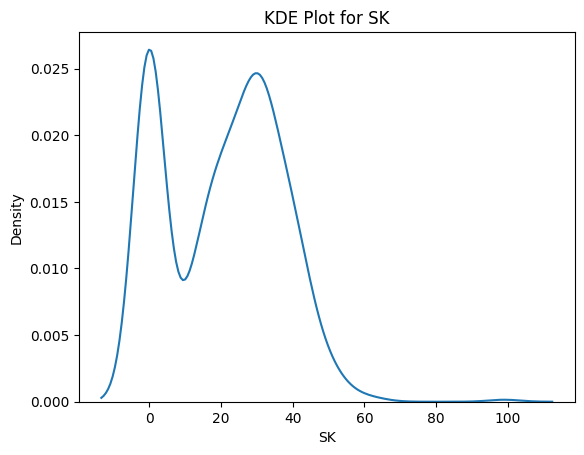

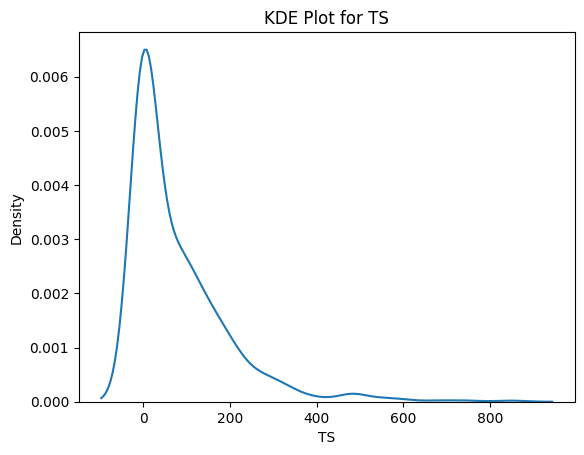

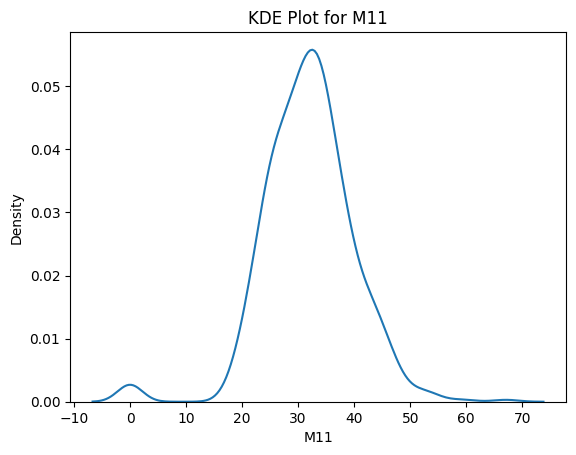

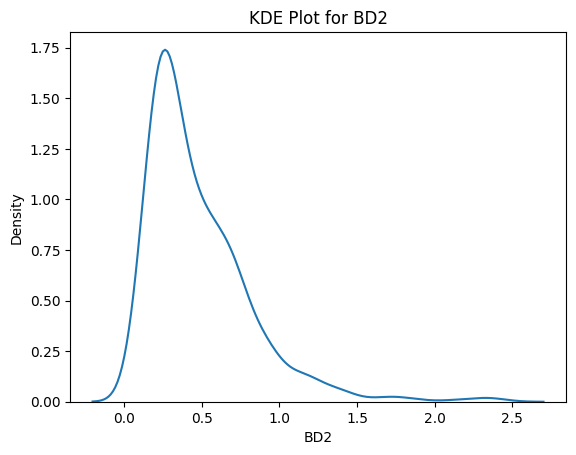

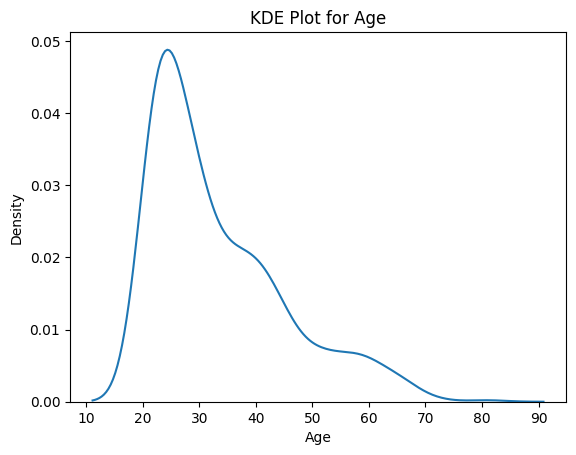

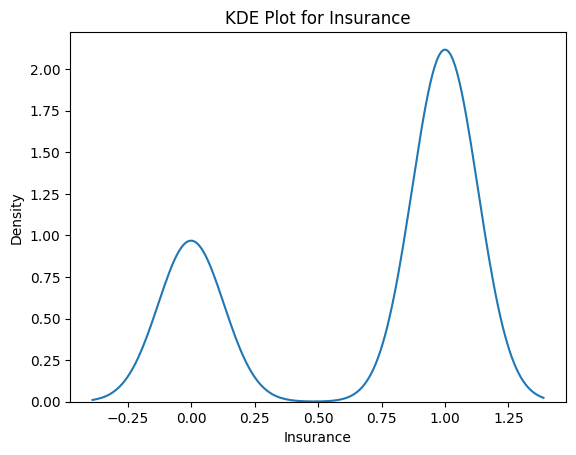

In [11]:
for i in numerics.columns:
    sns.kdeplot(data=numerics, x=i)
    plt.title(f'KDE Plot for {i}')
    plt.show()

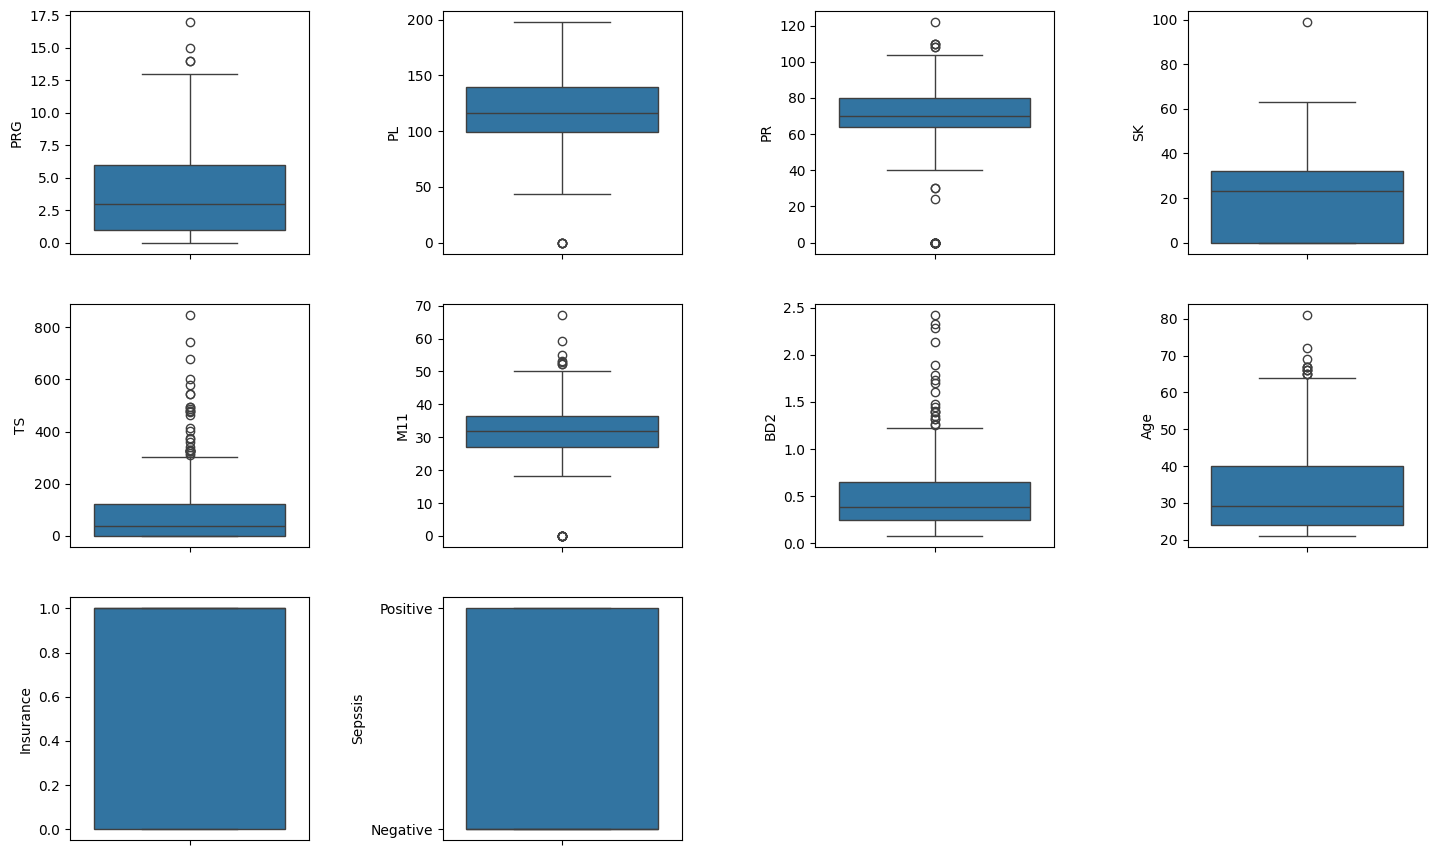

In [12]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(data):
    plt.subplot(5,4, i + 1)
    sns.boxplot(data,y=data[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

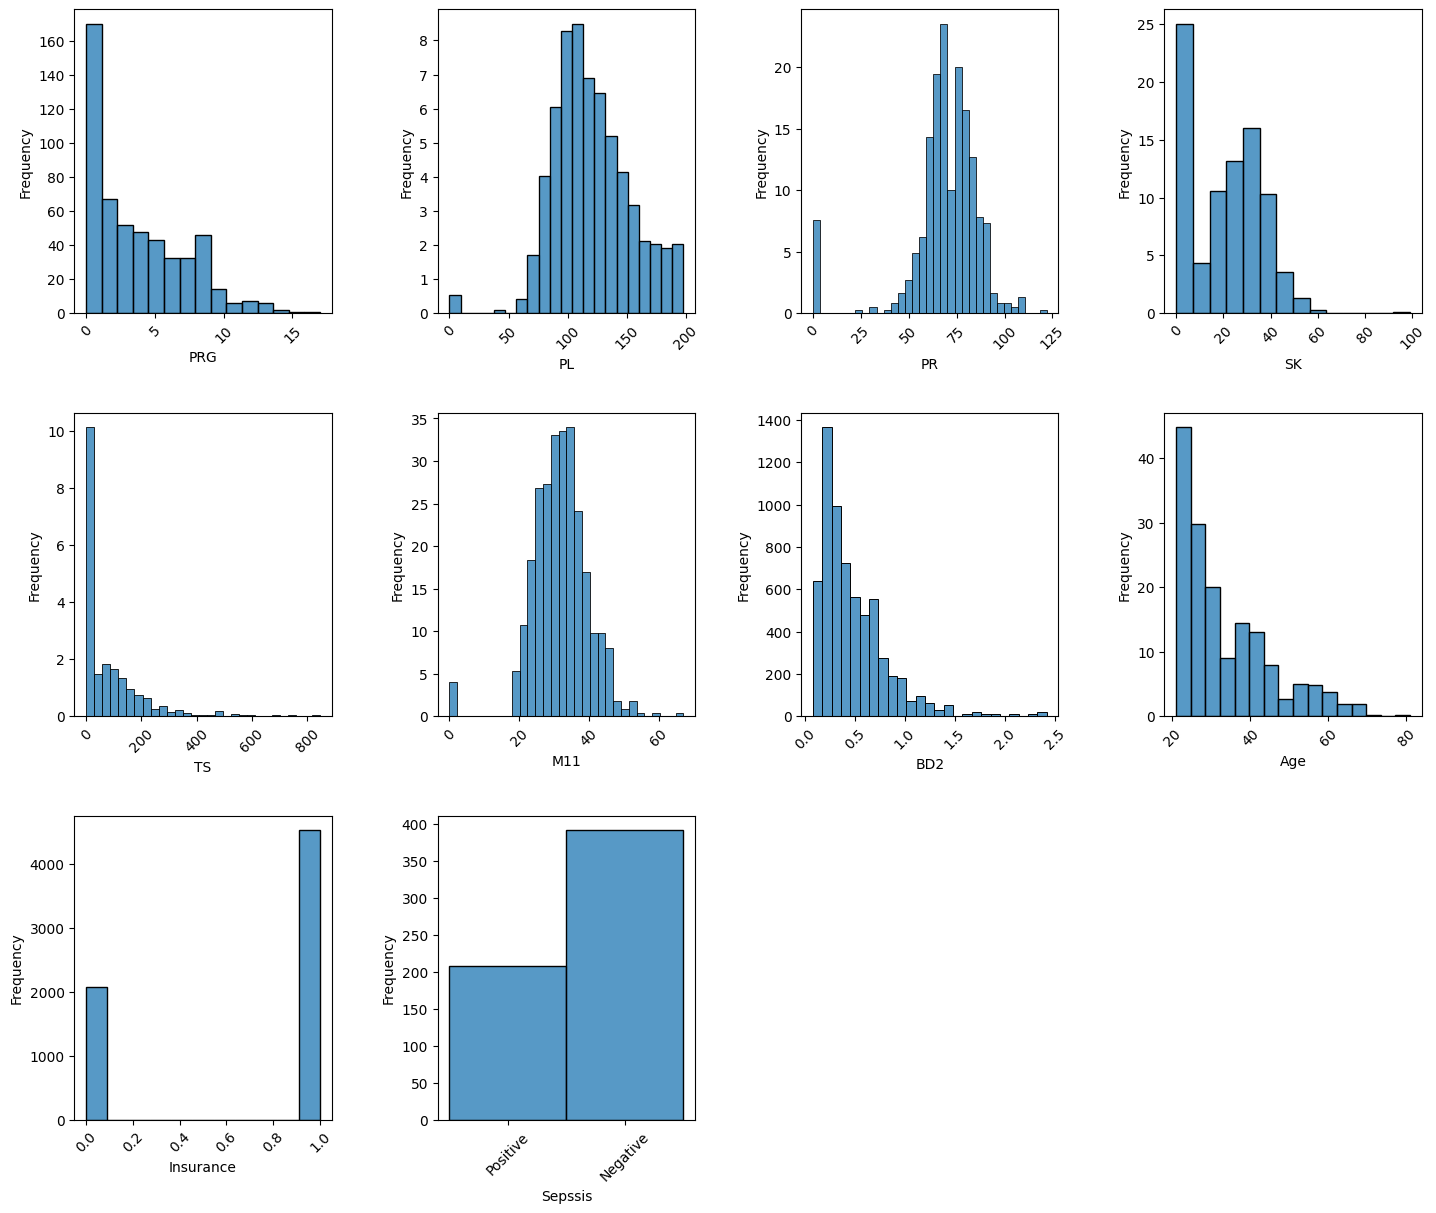

In [26]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(data):
    plt.subplot(5,4, i + 1)
    sns.histplot(data,x=data[variable], stat='frequency')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

<Axes: ylabel='Density'>

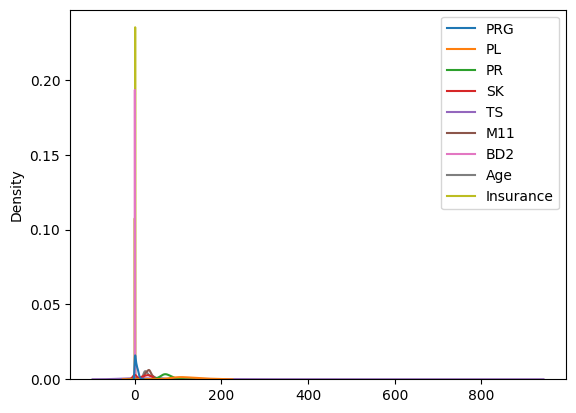

In [13]:
sns.kdeplot(data=data)

<Axes: >

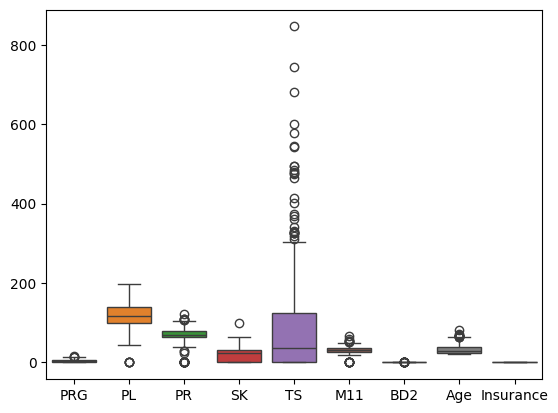

In [14]:
sns.boxplot(data=data)

<Axes: >

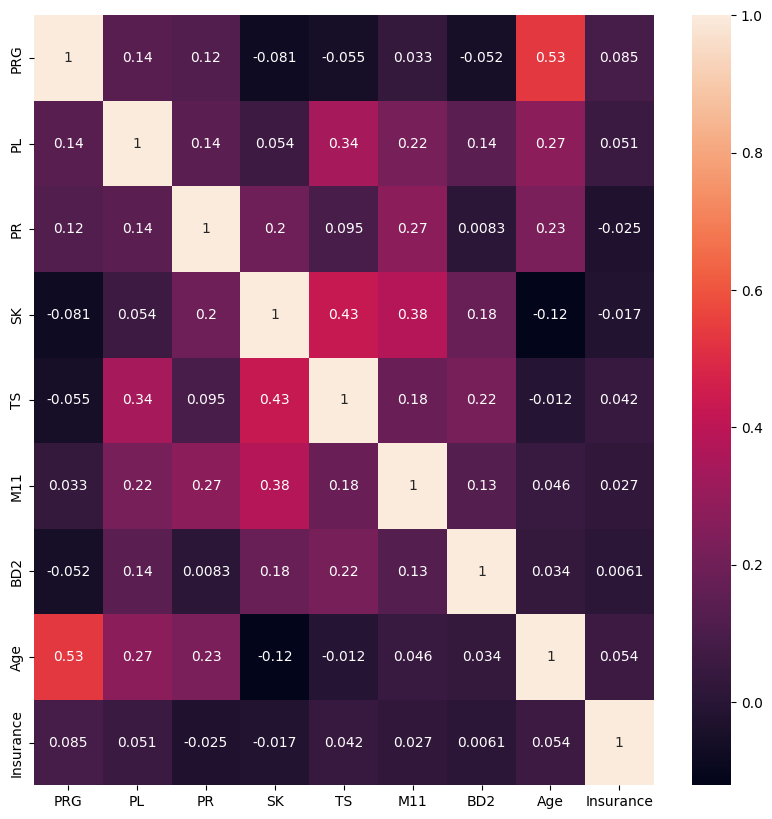

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=data.drop(['Sepssis'], axis=1).corr(), annot=True)

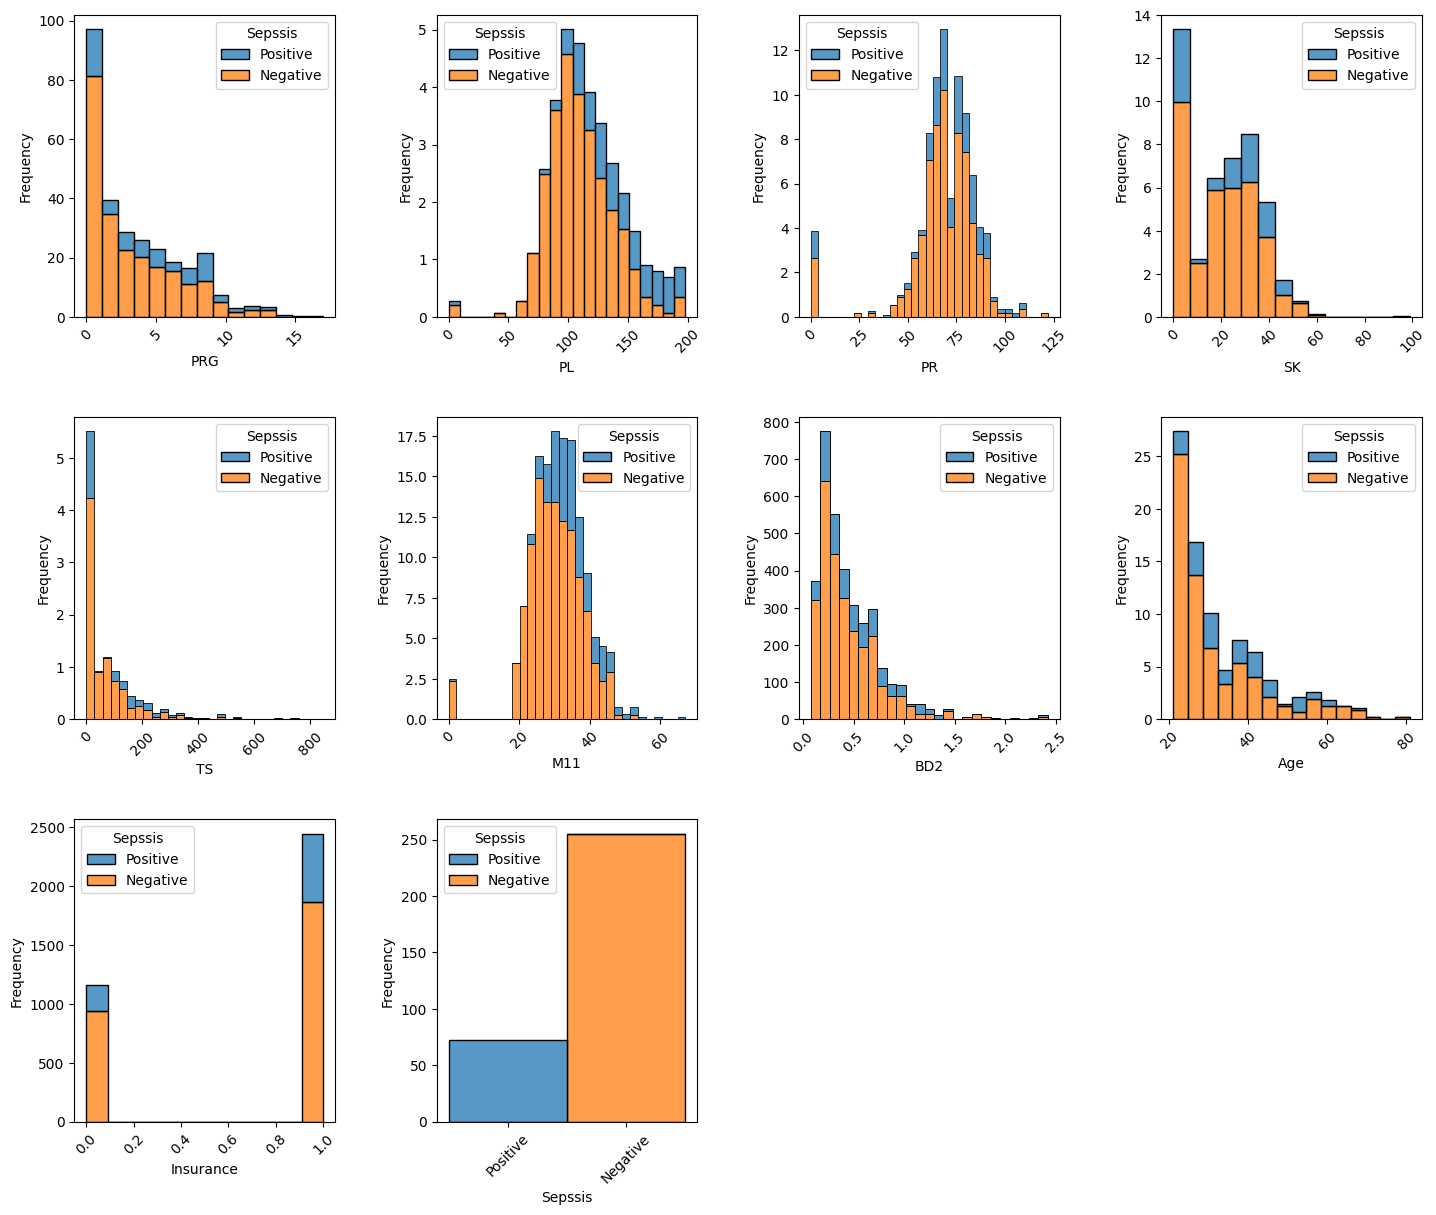

In [30]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(data):
    plt.subplot(5,4, i + 1)
    sns.histplot(data,x=data[variable], stat='frequency', hue='Sepssis', multiple='stack')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

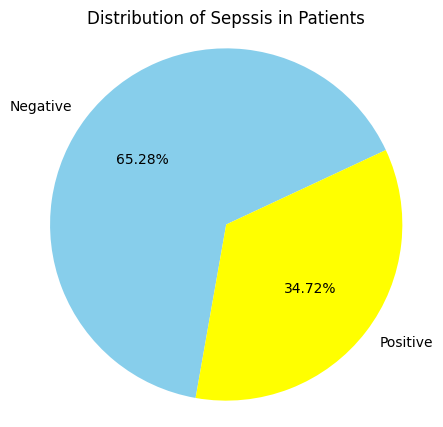

In [15]:
sepssis_counts = data['Sepssis'].value_counts()
explode = [0.05 if label == 'Yes' else 0 for label in sepssis_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(sepssis_counts, labels=sepssis_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'yellow'])
plt.axis('equal')
plt.title('Distribution of Sepssis in Patients')
plt.show()

### Hypothesis Tests 1 



 ### null hypothesis: there a no significant difference in plasma glucose levels between patients who develop sepsis and those who do not?
 ### alternative hyp: there is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

In [43]:
import pandas as pd
from scipy.stats import mannwhitneyu



# Separate the groups based on sepsis outcome
sepsis_positive = data[data['Sepssis'] == 'Positive']['PRG']

sepsis_negative = data[data['Sepssis'] == 'Negative']['PRG']

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(sepsis_positive, sepsis_negative)

# Print the results
print(f'Mann-Whitney U Test: U-statistic = {stat}, p-value = {p_value}')

# Interpretation of the results
if p_value < 0.05:
    print('There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.')
else:
    print('There is no significant difference in plasma glucose levels between patients who develop sepsis and those who do not.')


Mann-Whitney U Test: U-statistic = 49635.0, p-value = 7.517335229649623e-06
There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.


(Blood Work Result-1)

### Null Hypothesis (H0): There is no significant difference in Blood Work Results between patients who develop sepssis and those who do not.
### Alternative Hypothesis (H1): There is a significant difference in Blood Work Results between patients who develop sepsis and those who do not.

In [44]:


# List of blood work result columns
blood_work_columns = ['PL', 'SK', 'TS', 'BD2']


In [45]:

# Initialize a dictionary to store test results
results = {}


In [47]:

# Separate the groups based on sepsis outcome
sepsis_positive = data[data['Sepssis'] == 'Positive']
sepsis_negative = data[data['Sepssis'] == 'Negative']

# Perform the Mann-Whitney U Test for each blood work result
for col in blood_work_columns:
    positive_values = sepsis_positive[col]
    negative_values = sepsis_negative[col]
    
    # Perform the test
    stat, p_value = mannwhitneyu(positive_values, negative_values)
    
    # Store the results
    results[col] = {'U-statistic': stat, 'p-value': p_value}


In [48]:

# Print the results
for col, result in results.items():
    print(f'Blood Work Result: {col}')
    print(f"  U-statistic: {result['U-statistic']}")
    print(f"  p-value: {result['p-value']}")
    if result['p-value'] < 0.05:
        print('  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.\n')
    else:
        print('  There is no significant difference in this blood work result between patients who develop sepsis and those who do not.\n')


Blood Work Result: PL
  U-statistic: 63515.5
  p-value: 9.039444101550677e-30
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: SK
  U-statistic: 44975.5
  p-value: 0.0303558775856338
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: TS
  U-statistic: 44619.5
  p-value: 0.03737172167275455
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: BD2
  U-statistic: 49738.5
  p-value: 6.800958896250743e-06
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.



### Analytical Questions

In [15]:
data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [16]:
data['Insurance'] = data['Insurance'].map({0: 'Invalid', 1: 'Valid'})

In [17]:
data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Invalid,Positive
1,1,85,66,29,0,26.6,0.351,31,Invalid,Negative
2,8,183,64,0,0,23.3,0.672,32,Valid,Positive
3,1,89,66,23,94,28.1,0.167,21,Valid,Negative
4,0,137,40,35,168,43.1,2.288,33,Valid,Positive


In [18]:
Patient_counts = data['Insurance'].value_counts()
explode = [0.05 if label == 'Invalid' else 0 for label in Patient_counts.index]

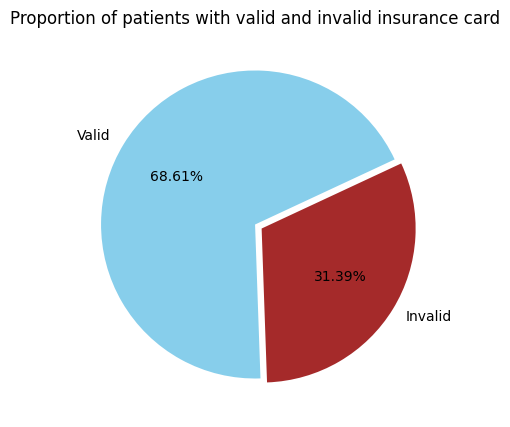

In [19]:
plt.figure(figsize=(5, 5))
plt.pie(Patient_counts, labels=Patient_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'brown'])
plt.title('Proportion of patients with valid and invalid insurance card')
plt.show()

### 2

In [20]:
Age_pressure = data.groupby('Age')['PR'].mean().reset_index()

In [42]:
Age_pressure

,Age,PR
0,21,65.788462
1,22,63.307692
2,23,64.222222
3,24,65.027027
4,25,59.100000
5,26,62.800000
6,27,72.571429
7,28,68.269231
8,29,68.185185
9,30,65.375000


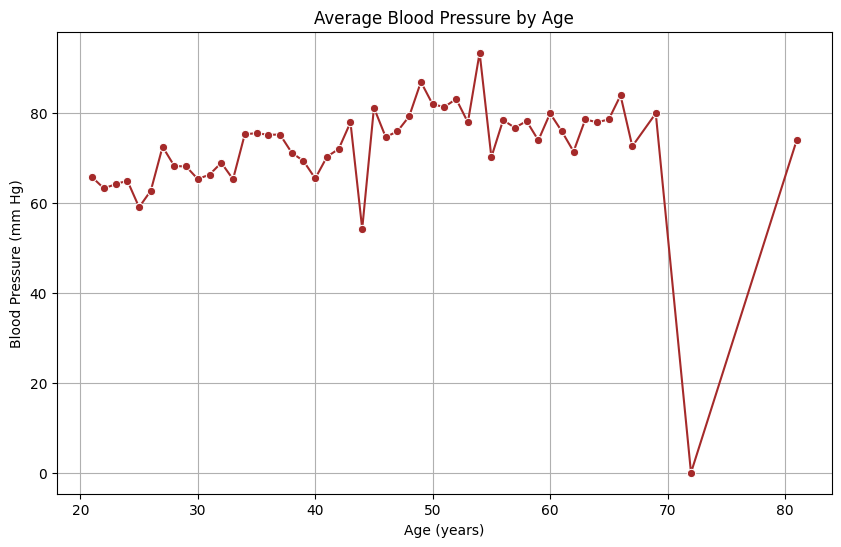

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='PR', data=Age_pressure, marker='o', color='brown')
plt.title('Average Blood Pressure by Age')
plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.grid(True)
plt.show()

In [18]:
Avg_M11_sepsis = data.groupby('Sepssis')['M11'].mean()

C:\Users\damzking\AppData\Local\Temp\ipykernel_14568\948733261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sepssis', y='M11', data=data, palette=['skyblue', 'brown'])


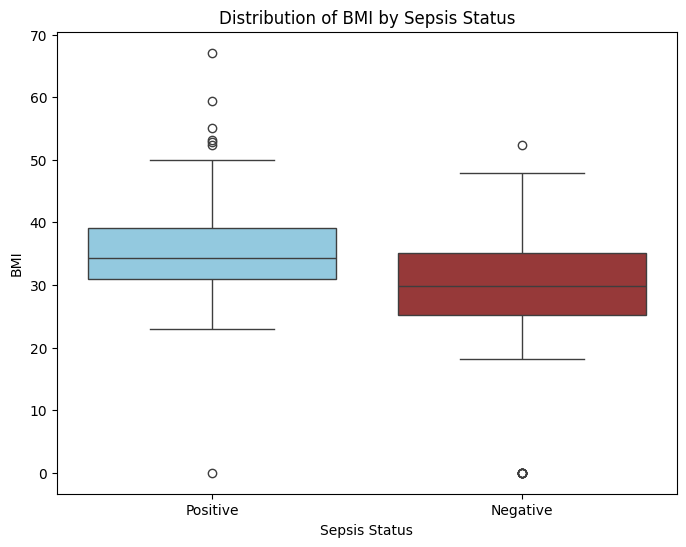

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sepssis', y='M11', data=data, palette=['skyblue', 'brown'])
plt.title('Distribution of BMI by Sepsis Status')
plt.xlabel('Sepsis Status')
plt.ylabel('BMI')
plt.show()

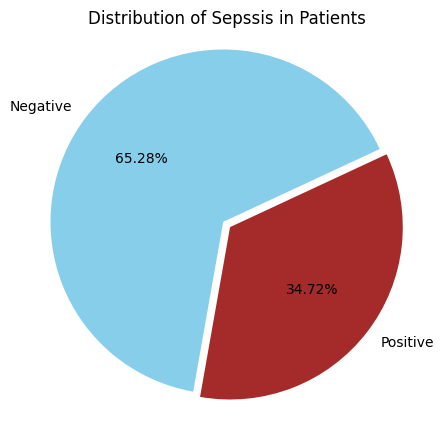

In [25]:
sepssis_counts = data['Sepssis'].value_counts()
explode = [0.05 if label == 'Positive' else 0 for label in sepssis_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(sepssis_counts, labels=sepssis_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'brown'])
plt.axis('equal')
plt.title('Distribution of Sepssis in Patients')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [23]:
X = data.drop(columns=['Sepssis']) 

y = data['Sepssis']  

In [24]:
X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size = 0.25, random_state = 5, stratify = y)

In [25]:
print(f'X_train shape: {X_train.shape}\nX_eval shape: {X_eval.shape}\ny_train shape: {y_train.shape}\ny_eval shape: {y_eval.shape}')

X_train shape: (449, 9)
X_eval shape: (150, 9)
y_train shape: (449,)
y_eval shape: (150,)


In [26]:
#Encoding dependent variables
encoder=LabelEncoder()

y_train_encode=encoder.fit_transform(y_train)
y_eval_encode=encoder.transform(y_eval)


#selecting numeric  columns
numeric_cols=X_train.select_dtypes(include='number').columns


#numerical pipeline
num_pipeline=Pipeline(steps=[
    ('num_scaler', RobustScaler())
])

preprocessor= ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numeric_cols)
])

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_curve, auc, confusion_matrix, classification_report )

In [28]:
# Feature selection step
feature_selection = SelectKBest(score_func=mutual_info_classif, k='all')

# Define models
models = {
    'Logistic_Regression': LogisticRegression(random_state=5),
    'Decision_Tree': DecisionTreeClassifier(random_state=5),
    'Random_Forest': RandomForestClassifier(random_state=5),
    'Gradient_Boosting': GradientBoostingClassifier(random_state=5)
}


In [29]:

# Initialize storage for pipelines and metrics
all_pipelines_balanced = {}
metric_table_balanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])


In [34]:

# Create, train, and evaluate pipelines for each model
for model_name, classifier in models.items(): 
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        ('feature_selection', feature_selection), 
        ('classifier', classifier)  
    ])
        
    balanced_pipeline.fit(X_train, y_train)
    all_pipelines_balanced[model_name] = balanced_pipeline
    
    y_pred = balanced_pipeline.predict(X_eval)
    
    metrics = classification_report(y_eval, y_pred, output_dict=True)
    
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    metric_table_balanced.loc[len(metric_table_balanced)] = [model_name, accuracy, precision, recall, f1_score]

# Sort and display results
metric_table_balanced.sort_values(by='f1-score', ascending=False, inplace=True)
print(metric_table_balanced)
    

            model_name  accuracy  precision    recall  f1-score
1  Logistic_Regression  0.726667   0.757509  0.726667  0.732888
0    Gradient_Boosting  0.686667   0.697766  0.686667  0.690744
4    Gradient_Boosting  0.686667   0.697766  0.686667  0.690744
3        Random_Forest  0.673333   0.684711  0.673333  0.677584
2        Decision_Tree  0.626667   0.648702  0.626667  0.633803
